# Search Tool for InTeractions of CHemicals (STITCH) Data Processing

In [1]:
import collections

In [13]:
import math

In [2]:
import matplotlib

In [3]:
matplotlib.use('Agg')

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [12]:
import numpy as np

In [6]:
import os

---

Exploration of *4932.actions.v4.0.tsv*:

**2015 December 2**

According to the README, the scores are "multiplied by 1000." From Kuhn, *et al.* (2014), high-confidence scores have a cutoff of 0.7. 

All entries in the "mode" column are of the following:
* activation
* binding
* catalysis
* inhibition
* reaction

Entries in the "action" column are either "activation" or "inhibition."

If "mode" entry is "activation" or "inhibition", then the corresponding entry in the "action" column is also "activation" or "inhibition", respectively. 

If "action" entry is "activation" or "inhibition", then the corresponding entry in the "mode" column (other than "activation" or "inhibition") is "binding."

**2015 December 4**

It turns out that not all of the entries in the 1<sup>st</sup> column of *4932.actions.v4.0.tsv* are chemicals - some are chemicals while others are genes, and likewise for the entries in the 2<sup>nd</sup> column. Also note that all chemical prefixes begin with "CID", and all gene entries start with "4932."

How many chemicals are just inhibition? Are there any that have mixed actions, such as inhibiting some targets and activating others?

In [8]:
stitchfile = open(os.path.join('..', 'DataDownload', 'STITCH', '4932.actions.v4.0.tsv'))

In [9]:
header = stitchfile.readline().rstrip().split('\t')
actCol = header.index('action')
scoreCol = header.index('score')

In [5]:
chem2act = collections.defaultdict(set)

In [6]:
for line in stitchfile:
    tokens = line.rstrip().split('\t')
    if tokens[actCol] == 'inhibition':
        if tokens[0][:3] == 'CID':
            chem2act[tokens[0]].add(tokens[actCol])
        else:
            chem2act[tokens[1]].add(tokens[actCol])

In [11]:
stitchfile.close()

In [8]:
len(chem2act)

2567

In [9]:
{len(chem2act[chem]) for chem in chem2act.keys()}

{1}

In [10]:
chem2act = {k: frozenset(v) for k,v in chem2act.items()}

In [11]:
set(chem2act.values())

{frozenset({'inhibition'})}

<u>Conclusion:</u> So it looks like *any* chemical whose action is inhibition only has that as its sole action, e.g. it also doesn't activate. 

**2015 December 4, 8**

How many targets does each inhibiting chemical have?

In [7]:
chem2target = collections.defaultdict(set)

In [10]:
for line in stitchfile:
    tokens = line.rstrip().split('\t')
    if tokens[actCol] == 'inhibition' and float(tokens[scoreCol]) >= 700:
        if tokens[0][:3] == 'CID':
            chem = tokens[0]
            target = tokens[1]
        else:
            chem = tokens[1]
            target = tokens[0]
        chem2target[chem].add(target)

In [15]:
numTargets = np.array([len(chem2target[chem]) for chem in chem2target])

In [16]:
numTargets.size

806

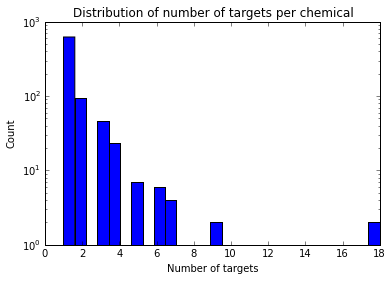

In [21]:
plt.hist(numTargets, bins=round(math.sqrt(numTargets.size)), log=True)
plt.xlabel('Number of targets')
plt.ylabel('Count')
plt.title('Distribution of number of targets per chemical')
plt.show()

In [22]:
np.unique(numTargets)

array([ 1,  2,  3,  4,  5,  6,  7,  9, 18])